In [1]:
import os
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.io
import re
import cv2
import h5py
from tqdm.notebook import trange, tqdm
from cellpose import models, core, utils
import napari
from skimage import img_as_ubyte
from skimage.color import rgb2hed, hed2rgb, rgb2gray
from skimage import exposure, util


In [2]:
cwd = Path(r'Y:\coskun-lab\Manali cases TNBC-immune')


# Read Rois

In [3]:
paths = []
names = []
ROIs = []

for (dirpath, dirnames, filenames) in os.walk(cwd / 'cropped'):
    for name in filenames:
        if 'tif' not in name:
            continue
        path = os.path.join(dirpath, name)
        file = name.split('.')[0]
        
        paths.append(path)
        names.append(file.split('_')[0])
        ROIs.append(int(file.split('_')[1]))       
        
df = pd.DataFrame({'Name': names, 'ROI': ROIs, 'Path': paths})

In [4]:
df

Name  ROI                                               Path
0   240584    0  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
1   240584    1  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
2   240584    2  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
3   240584    3  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
4   240584    4  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
5   240585    0  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
6   240585    1  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
7   240585    2  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
8   240586    0  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
9   240586    1  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
10  240587    0  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
11  240607    0  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
12  240607    1  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
13  240607    2  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
14  240608    0  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
15  240608    1  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
16  240608    2  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
17  240608    3  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
18  240608    4  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
19  240608    5  Y:\coskun-lab\Manali cases TNBC-immune\cropped...
20  240608    6  Y:\coskun-lab\Manali cases TNBC-immune\cropped...

In [8]:
from cellpose import models, core, utils

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=True, model_type='nuclei')


** TORCH CUDA version installed and working. **
>>>> using GPU


Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240584_0.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240584_1.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240584_2.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240584_3.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240584_4.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240585_0.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240585_1.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240585_2.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240586_0.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240586_1.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240587_0.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240607_0.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240607_1.tiff
Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240607_2.tiff
processing 1 image(s)


C:\Users\thu71\.conda\envs\WSI\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


time spent: running network 309.12s; flow+mask computation 107504.30
estimated masks for 1 image(s) in 107826.16 sec
>>>> TOTAL TIME 107826.16 sec


C:\Users\thu71\AppData\Local\Temp/ipykernel_69852/4135240920.py:45: UserWarning: Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240607_2.tiff is a low contrast image
  skimage.io.imsave(mask_path, masks_nuclei)


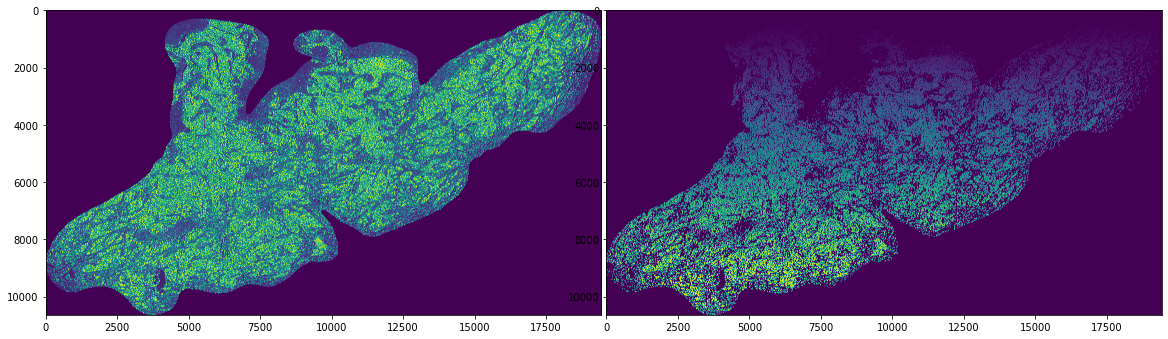

Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_0.tiff
processing 1 image(s)
time spent: running network 59.64s; flow+mask computation 2902.49
estimated masks for 1 image(s) in 2964.26 sec
>>>> TOTAL TIME 2964.26 sec


C:\Users\thu71\AppData\Local\Temp/ipykernel_69852/4135240920.py:45: UserWarning: Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_0.tiff is a low contrast image
  skimage.io.imsave(mask_path, masks_nuclei)


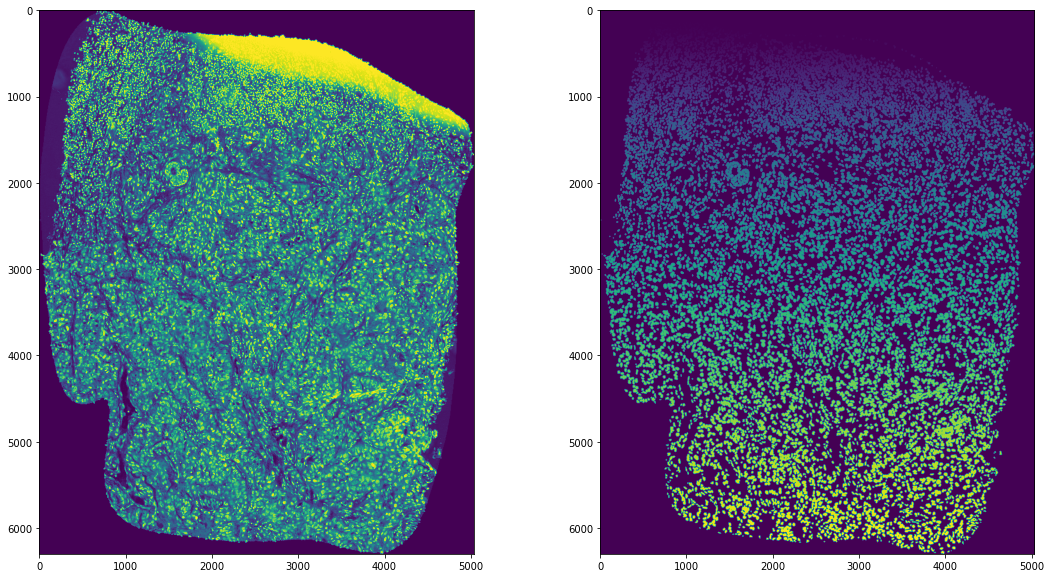

Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_1.tiff
processing 1 image(s)
time spent: running network 15.76s; flow+mask computation 359.99
estimated masks for 1 image(s) in 376.43 sec
>>>> TOTAL TIME 376.43 sec


C:\Users\thu71\AppData\Local\Temp/ipykernel_69852/4135240920.py:45: UserWarning: Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_1.tiff is a low contrast image
  skimage.io.imsave(mask_path, masks_nuclei)


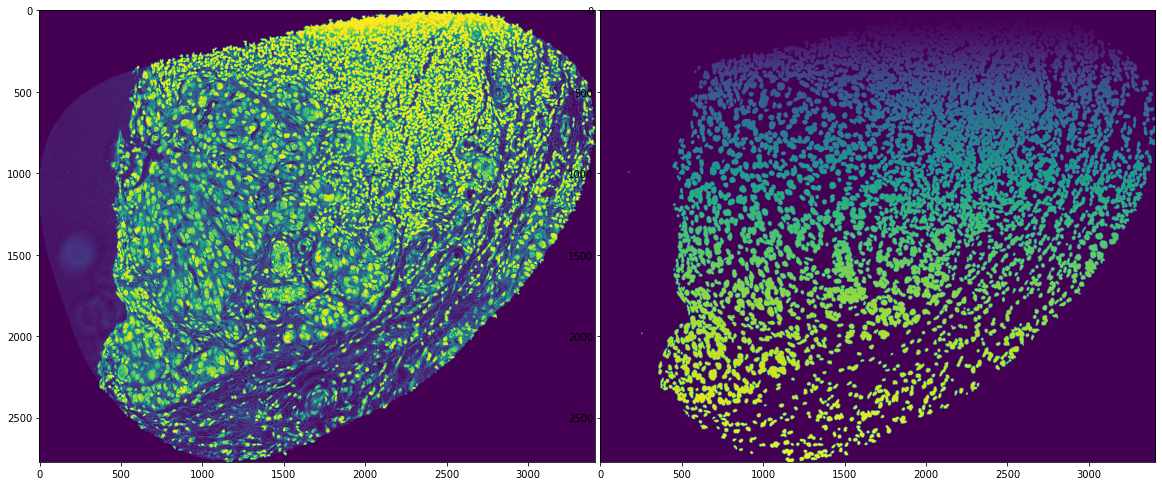

Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_2.tiff
processing 1 image(s)
time spent: running network 24.29s; flow+mask computation 706.99
estimated masks for 1 image(s) in 732.33 sec
>>>> TOTAL TIME 732.33 sec


C:\Users\thu71\AppData\Local\Temp/ipykernel_69852/4135240920.py:45: UserWarning: Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_2.tiff is a low contrast image
  skimage.io.imsave(mask_path, masks_nuclei)


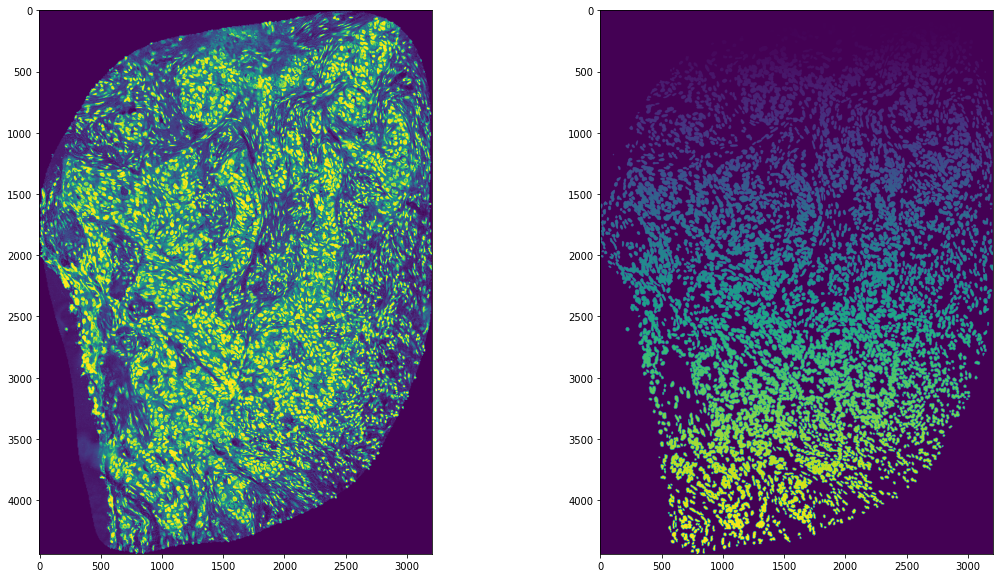

Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_3.tiff
processing 1 image(s)
time spent: running network 25.67s; flow+mask computation 735.64
estimated masks for 1 image(s) in 762.38 sec
>>>> TOTAL TIME 762.38 sec


C:\Users\thu71\AppData\Local\Temp/ipykernel_69852/4135240920.py:45: UserWarning: Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_3.tiff is a low contrast image
  skimage.io.imsave(mask_path, masks_nuclei)


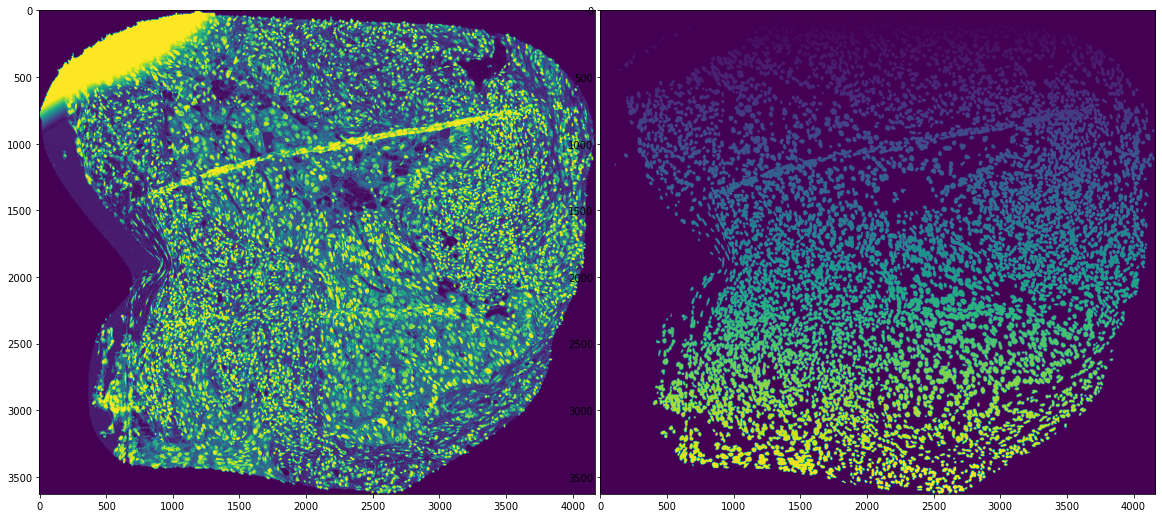

Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_4.tiff
processing 1 image(s)
time spent: running network 24.27s; flow+mask computation 622.30
estimated masks for 1 image(s) in 647.59 sec
>>>> TOTAL TIME 647.59 sec


C:\Users\thu71\AppData\Local\Temp/ipykernel_69852/4135240920.py:45: UserWarning: Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_4.tiff is a low contrast image
  skimage.io.imsave(mask_path, masks_nuclei)


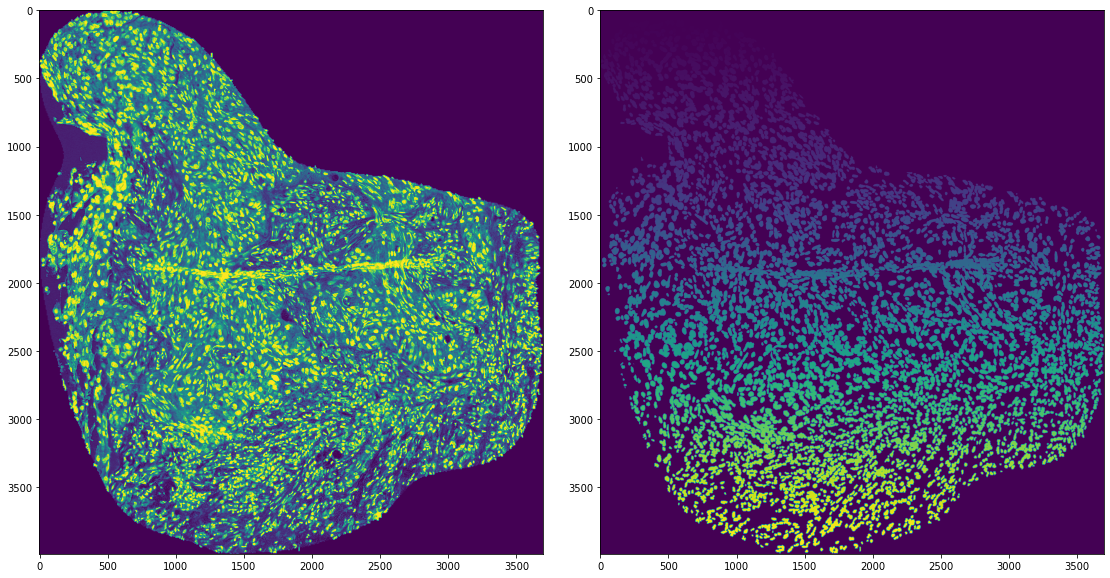

Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_5.tiff
processing 1 image(s)
time spent: running network 18.78s; flow+mask computation 392.58
estimated masks for 1 image(s) in 412.15 sec
>>>> TOTAL TIME 412.15 sec


C:\Users\thu71\AppData\Local\Temp/ipykernel_69852/4135240920.py:45: UserWarning: Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_5.tiff is a low contrast image
  skimage.io.imsave(mask_path, masks_nuclei)


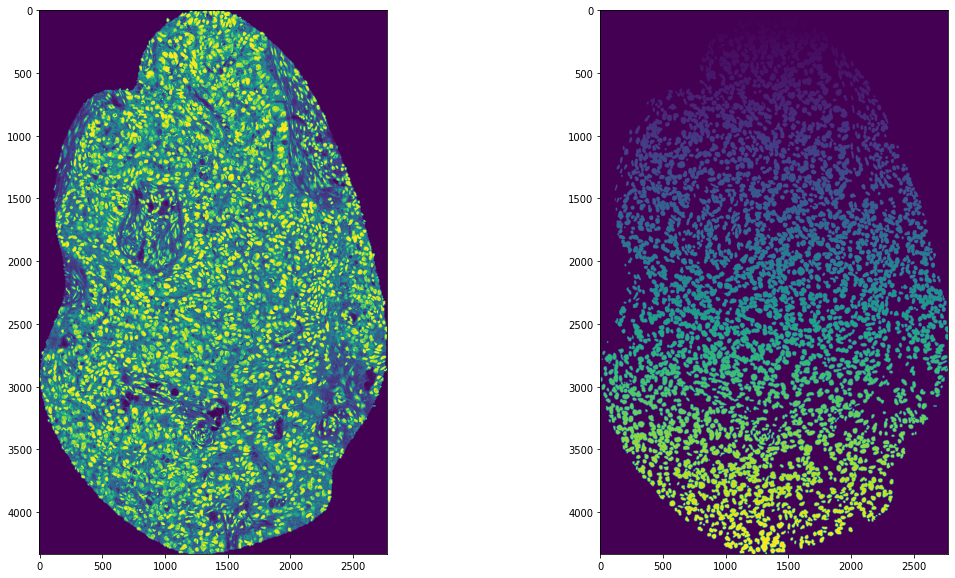

Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_6.tiff
processing 1 image(s)
time spent: running network 35.40s; flow+mask computation 1374.79
estimated masks for 1 image(s) in 1411.81 sec
>>>> TOTAL TIME 1411.81 sec


C:\Users\thu71\AppData\Local\Temp/ipykernel_69852/4135240920.py:45: UserWarning: Y:\coskun-lab\Manali cases TNBC-immune\segmentation\240608_6.tiff is a low contrast image
  skimage.io.imsave(mask_path, masks_nuclei)


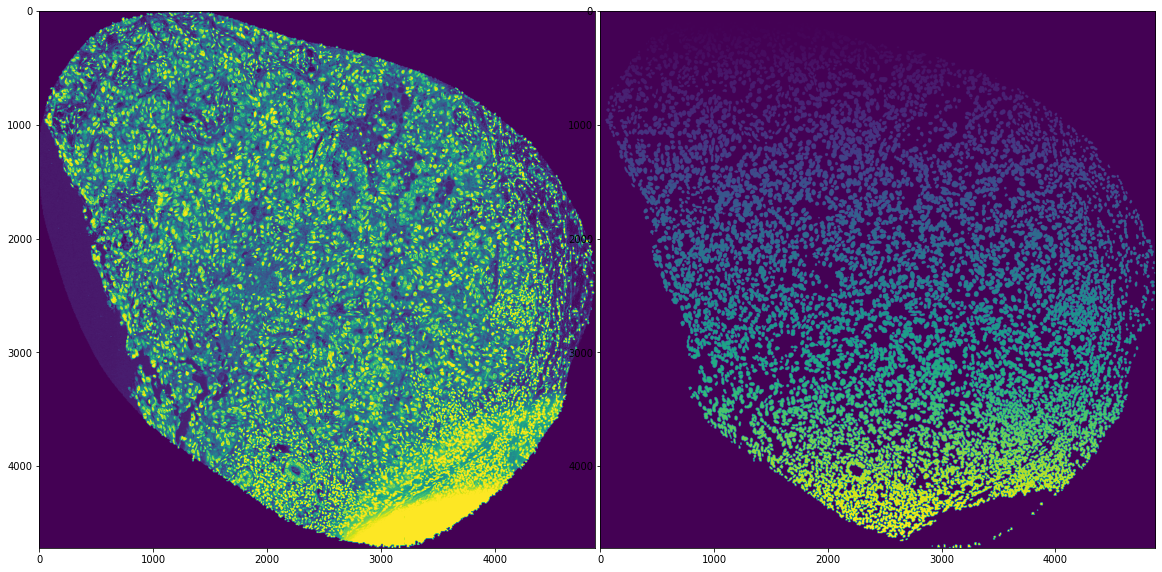

In [9]:
for row in df.itertuples():
    name = row.Name
    ROI = row.ROI
    path = row.Path
    
    mask_path = cwd / 'segmentation' / f'{name}_{ROI}.tiff'
    print(mask_path)
    if os.path.exists(mask_path):
        continue
    
    # Read img
    img = skimage.io.imread(path)
    img = img_as_ubyte(img)
    
    # Deconvolution
    ihc_hed = rgb2hed(img)
    null = np.zeros_like(ihc_hed[:, :, 0])
    ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
    ihc_h = util.invert(rgb2gray(ihc_h))
    
    # Contrast stretching
    p2, p98 = np.percentile(ihc_h, (0, 90))
    img_rescale = exposure.rescale_intensity(ihc_h, in_range=(p2, p98), out_range=(0, 255)).astype(np.uint8)
    
    # Masking
    dest = cwd / 'masks' / f'{name}_{ROI}.tiff'
    try:
        mask = skimage.io.imread(dest)
        img_rescale = cv2.bitwise_and(img_rescale, img_rescale, mask=mask)
    except:pass
    
    # Segmentation
    masks_nuclei, _, _, _ = model.eval(img_rescale, diameter=15, channels = [0,0], cellprob_threshold=-6, flow_threshold=0.8)
    
    # Plot result 
    try:
        fig, ax = plt.subplots(1,2,figsize=(20,10))
        ax[0].imshow(img_rescale)
        ax[1].imshow(masks_nuclei)
        fig.subplots_adjust(wspace=0.01)
    except:
        pass
    
   
    skimage.io.imsave(mask_path, masks_nuclei) 
    plt.show()


# Extract single cell info

In [5]:
from skimage import measure 

def read_intensity_per_cell(img, mask):
    props = measure.regionprops_table(mask, img,
                                             properties = ['label', 'mean_intensity', 'area', 'eccentricity'] )
    df_prop = pd.DataFrame(props)
    
    return df_prop

In [6]:
paths = []
names = []
ROIs = []

for (dirpath, dirnames, filenames) in os.walk(cwd / 'cropped'):
    for name in filenames:
        path = os.path.join(dirpath, name)
        file = name.split('.')[0]
        
        paths.append(path)
        names.append(file.split('_')[0])
        ROIs.append(file.split('_')[1])       
        
df = pd.DataFrame({'Name': names, 'ROI': ROIs, 'Path': paths})

In [20]:
dfs = []
for row in df.itertuples():
    name = row.Name
    ROI = row.ROI
    path = row.Path
    
    print(name)
    
    mask_path = cwd / 'segmentation' / f'{name}_{ROI}.tiff'
    if not os.path.exists(mask_path):
        continue
    
    # Read img
    img = skimage.io.imread(path)
    img = img_as_ubyte(img)
    
    mask = skimage.io.imread(mask_path)
    
    # Deconvolution
    ihc_hed = rgb2hed(img)
    null = np.zeros_like(ihc_hed[:, :, 0])
    ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
    ihc_h = util.invert(rgb2gray(ihc_h))
    
    # Contrast stretching
    p2, p98 = np.percentile(ihc_h, (0.1, 99.9))
    img_rescale = exposure.rescale_intensity(ihc_h, in_range=(p2, p98), out_range=(0, 255)).astype(np.uint8)
    
    df_prop = read_intensity_per_cell(img_rescale, mask)
    df_prop['Name'] = name
    df_prop['ROI'] = ROI
    df_prop['Path'] = path
    
    dfs.append(df_prop)

240584
240584
240584
240584
240584
240585
240585
240585
240586
240586
240587
240607
240607
240607
240608
240608
240608
240608
240608
240608
240608


In [21]:
df_all = pd.concat(dfs)

In [22]:
df_all.to_csv('single_cell_breast.csv', index=False)

# Classify cells

In [7]:
import pickle
from skimage.segmentation import mark_boundaries


In [9]:
df_all = pd.read_csv('single_cell_breast.csv')

In [10]:
group = df_all.groupby(['Name', 'ROI', 'Path'])

In [11]:
# img_bds  = []
# imgs = []
# mask_lymphs = []
# mask_stromas = []
# mask_tumors = []
# names = []

for name, df_group in group:
    print(name)
#     names.append(name[0]+'_'+name[1])
    
    file = name[0]
    roi = name[1]
    path = name[2]
    
    mask_path = cwd / 'segmentation' / f'{file}_{roi}.tiff'
    if not os.path.exists(mask_path):
        continue
    mask = skimage.io.imread(mask_path)
    
    df_lymph = df_group[(df_group['area'] < 500) & (df_group['mean_intensity'] > 120) & (df_group['eccentricity'] < 0.7)]
    df_stroma = df_group[(df_group['eccentricity'] > 0.9)]
    
    label_lymph = df_lymph.label.tolist()
    mask_lymph = np.where(np.isin(mask, label_lymph), mask, 0)
#     mask_lymphs.append(mask_lymph)
    
    label_stroma = df_stroma.label.tolist()
    mask_stroma = np.where(np.isin(mask, label_stroma), mask, 0)
#     mask_stromas.append(mask_stroma)
    
    mask_tumor = np.where(~np.isin(mask, label_lymph), mask, 0)
    mask_tumor = np.where(~np.isin(mask_tumor, label_stroma), mask_tumor, 0)
#     mask_tumors.append(mask_tumor)
    
    with open(cwd / 'cell_classification'/ f"{file}_{roi}.pickle", "wb") as f:
        pickle.dump((mask_lymph, mask_tumor, mask_stroma), f)
    
    # Read img
    img = skimage.io.imread(path)
    img = img_as_ubyte(img)
#     imgs.append(img)
    
    # Mark boundaries
    img_bd = mark_boundaries(img, mask_lymph, color=(0,1,0), mode='thick')
    img_bd = mark_boundaries(img_bd, mask_stroma, color=(1,1,0), mode='thick')
    img_bd = mark_boundaries(img_bd, mask_tumor, color=(1,0,0), mode='thick')
    
    filename = cwd / 'cell_classification'/ f'{file}_{roi}.png'
    skimage.io.imsave(filename, img_bd)


(240584, 0, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240584_0.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240584, 1, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240584_1.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240584, 2, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240584_2.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240584, 3, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240584_3.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240584, 4, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240584_4.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240585, 0, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240585_0.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240585, 1, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240585_1.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240585, 2, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240585_2.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240586, 0, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240586_0.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240586, 1, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240586_1.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240587, 0, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240587_0.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240607, 0, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240607_0.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240607, 1, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240607_1.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240607, 2, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240607_2.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240608, 0, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240608_0.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240608, 1, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240608_1.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240608, 2, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240608_2.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240608, 3, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240608_3.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240608, 4, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240608_4.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240608, 5, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240608_5.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(240608, 6, 'Y:\\coskun-lab\\Manali cases TNBC-immune\\cropped\\240608_6.tiff')


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
